In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy
dataset = pd.read_csv('spambase.data');
dataset.head()

%matplotlib inline

In [29]:
def load_spam_data():
  data = pd.read_csv('spambase.data', header=None)
  data = data.replace("?",numpy.NAN)
  data.rename(columns={57:'is_spam'}, inplace=True)
  spam = data[data['is_spam'] == 1]
  notSpam = data[data['is_spam'] == 0]
  spam_train, spam_test = train_test_split(spam, train_size=0.6)
  notSpam_train, notSpam_test = train_test_split(notSpam, train_size=0.6)
  X_train = notSpam_train.append(spam_train)
  y_train = X_train.pop('is_spam')
  X_test = notSpam_test.append(spam_test)
  y_test = X_test.pop('is_spam')
  return X_train,y_train,X_test,y_test

In [30]:
x_train,y_train,x_test,y_test = load_spam_data()

In [31]:
# normalizing
allFeatures = x_train;
allFeatures.append(x_test)
mean = allFeatures.mean(axis = 0)
std = allFeatures.std(axis=0)
x_train = x_train -mean
x_test = x_test-mean
x_train = x_train/std
x_test = x_test/std
print(x_train.shape)
x_val = x_train[:400]
x_train = x_train[400:]
y_val = y_train[:400]
y_train = y_train[400:]

(2759, 57)


In [32]:
from keras.engine.training import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten,BatchNormalization,Activation,Conv2D,MaxPool2D
model = Sequential()
model.add(Dense(16, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=40,batch_size=64)

Epoch 1/40
37/37 [==============================] - 1s 9ms/step - loss: 0.7810 - accuracy: 0.5337 - val_loss: 0.5092 - val_accuracy: 0.9000
Epoch 2/40
37/37 [==============================] - 0s 4ms/step - loss: 0.5995 - accuracy: 0.6689 - val_loss: 0.4614 - val_accuracy: 0.9000
Epoch 3/40
37/37 [==============================] - 0s 4ms/step - loss: 0.5162 - accuracy: 0.7563 - val_loss: 0.4049 - val_accuracy: 0.8925
Epoch 4/40
37/37 [==============================] - 0s 3ms/step - loss: 0.4478 - accuracy: 0.8050 - val_loss: 0.3741 - val_accuracy: 0.8750
Epoch 5/40
37/37 [==============================] - 0s 4ms/step - loss: 0.4041 - accuracy: 0.8304 - val_loss: 0.3417 - val_accuracy: 0.8900
Epoch 6/40
37/37 [==============================] - 0s 4ms/step - loss: 0.3761 - accuracy: 0.8457 - val_loss: 0.3141 - val_accuracy: 0.8950
Epoch 7/40
37/37 [==============================] - 0s 4ms/step - loss: 0.3384 - accuracy: 0.8669 - val_loss: 0.2913 - val_accuracy: 0.9000
Epoch 8/40
37/37 [==

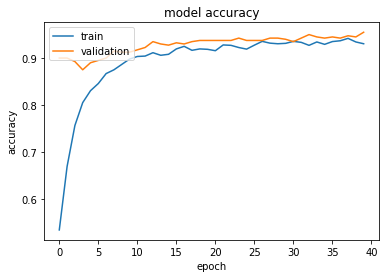

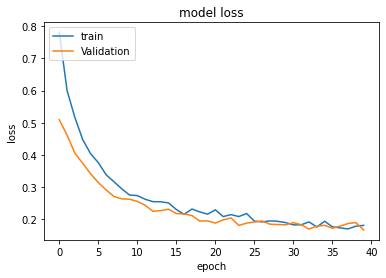

In [35]:
import matplotlib.pyplot as plt
history = model.history
print(history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

In [15]:
model.save('model2.hdf5')

In [49]:
model.load_weights('model2.hdf5')
from sklearn.metrics import confusion_matrix
y_predictions = model.predict(x_test)
y_predictions = numpy.round(y_predictions)
TN, FP, FN, TP = confusion_matrix(y_test, y_predictions).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)
accuracy  = (TP+TN)/(TP+TN+FP+FN)*100
print("Accuracy Of The Model = ",accuracy)

True Positive(TP)  =  662
False Positive(FP) =  57
True Negative(TN)  =  1059
False Negative(FN) =  64
Accuracy Of The Model =  93.43105320304016
